#### Set Up

In [14]:
import pandas as pd

def read_data(file_path_train, file_path_test):
	train_df = pd.read_csv(file_path_train)
	test_df = pd.read_csv(file_path_test)
	return train_df, test_df

In [15]:
train_df, test_df = read_data("../data/modified_train.csv", "../data/test.csv")

## Data Exploration
- Test 1: Data Characteristics
    - Shape, size, dtypes, and meaning of each line.
    - Datatype of each numerical column.
    - Duplicated rows, missing values, and unique values.
- Test 2: Stats
    - Min, Max, Mean, Median, and Mode
    - Q1 and Q3
    - Standard Deviation and Variance
- Test 3: Distribution and Outliner Analysis
- Test 4: Correalation Analysis
- Test 5: Other
### Test 1 - Data Characteristics

In [16]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,NaN,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,NaN,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,NaN,75,0.0,0,1,1


In [17]:
print(f"Shape of train_df: {train_df.shape}\n")
print(f"Labels of train_df columns:\n{train_df.columns}\n")
print(f"Data types of train_df columns:\n{train_df.dtypes}\n")

Shape of train_df: (11430, 12)

Labels of train_df columns:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Data types of train_df columns:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object



In [18]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [19]:
print(f"Shape of test_df: {test_df.shape}\n")
print(f"Labels of test_df columns:\n{test_df.columns}\n")
print(f"Data types of test_df columns:\n{test_df.dtypes}\n")

Shape of test_df: (6493, 9)

Labels of test_df columns:
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

Data types of test_df columns:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object



#### Classification
| Column      | Data Type  |
|-------------|------------|
| datetime    | Time-seires     |
| season      | Nominal      |
| holiday     | Binary      |
| workingday  | Binary      |
| weather     | Ordinal      |
| temp        | Nominal    |
| atemp       | Nominal    |
| humidity    | Nominal      |
| windspeed   | Nominal    |
| casual   | Nominal    |
| registered   | Nominal    |
| count   | Nominal    |

#### Uniqueness, NA-Values and Duplication

In [20]:
for col in ['season', 'holiday', 'workingday', 'weather']:
    counts = train_df[col].value_counts()
    ratios = train_df[col].value_counts(normalize=True)
    summary_df = pd.DataFrame({'Count': counts, 'Ratio': round(ratios, 2)})
    print(f"{summary_df}\n")

        Count  Ratio
season              
3        2885   0.25
4        2874   0.25
2        2853   0.25
1        2818   0.25

         Count  Ratio
holiday              
0        11110   0.97
1          320   0.03

            Count  Ratio
workingday              
1            7783   0.68
0            3647   0.32

         Count  Ratio
weather              
1         7556   0.66
2         2968   0.26
3          905   0.08
4            1   0.00



In [21]:
train_df_rows_na = train_df[train_df.isna().any(axis=1)]
print(f'train_df rows w/ na-values: {len(train_df_rows_na)}')

train_df_na_ratio = train_df.isna().mean()
train_df_columns_na = train_df_na_ratio[train_df_na_ratio > 0]
print("Columns with NA values and their missing value ratio:")
for col, ratio in train_df_columns_na.items():
    print(f"{col}: {ratio:.1%}")

train_df rows w/ na-values: 3093
Columns with NA values and their missing value ratio:
temp: 10.0%
atemp: 10.0%
windspeed: 10.0%


In [22]:
train_df_rows_duplicated = train_df.duplicated()
train_df_rows_duplicated = train_df_rows_duplicated[train_df_rows_duplicated == True]
print(f'train_df rows w/ duplicated values: {len(train_df_rows_duplicated)}')

train_df rows w/ duplicated values: 309


In [23]:
duplicated_rows = train_df[train_df.duplicated()]

for col in train_df.columns:
    
    if col in ["season", "holiday", "workingday", "weather"]:
        print(duplicated_rows[col].value_counts())
        print()

season
3    86
1    79
2    75
4    69
Name: count, dtype: int64

holiday
0    305
1      4
Name: count, dtype: int64

workingday
1    212
0     97
Name: count, dtype: int64

weather
1    207
2     73
3     29
Name: count, dtype: int64



#### Test 2 - Stats

In [24]:
train_df_humidity = train_df['humidity']
print(f"Min: {train_df_humidity.min()}")
print(f"Max: {train_df_humidity.max()}")
print(f"Mean: {round(train_df_humidity.mean(), 2)}")
print(f"Median: {train_df_humidity.median()}")
print(f"Mode: {train_df_humidity.mode().iloc[0]}")
print(f"Q1: {train_df_humidity.quantile(q=0.25)}")
print(f"Q3: {train_df_humidity.quantile(q=0.75)}")
print(f"Variance: {round(train_df_humidity.var(), 2)}")
print(f"Standard Deviation: {round(train_df_humidity.std(), 2)}")

Min: 0
Max: 100
Mean: 61.89
Median: 62.0
Mode: 88
Q1: 47.0
Q3: 77.0
Variance: 370.91
Standard Deviation: 19.26


### Test 3 - Distribution & Outliner Analysis

#### Distribution

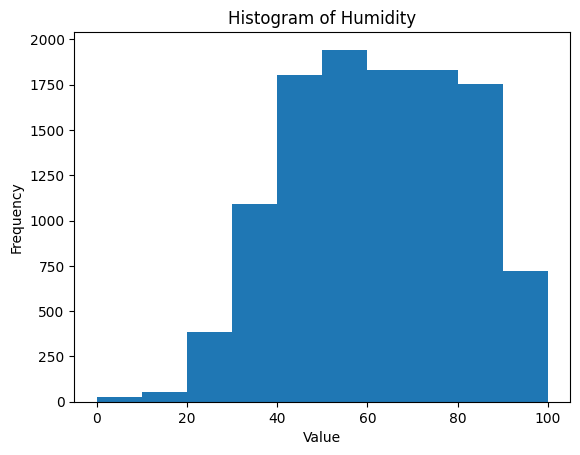

In [25]:
import matplotlib.pyplot as plt

plt.hist(train_df_humidity, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity')
plt.show()

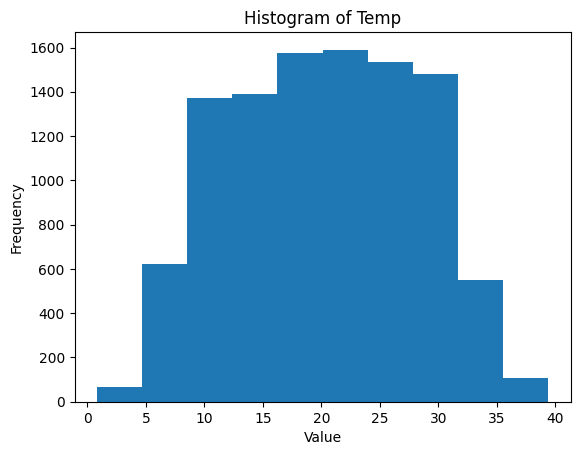

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_df['temp'], bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Temp')
plt.show()

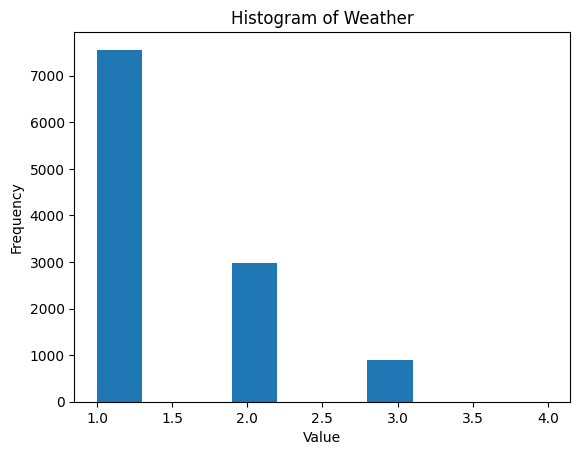

In [ ]:
import matplotlib.pyplot as plt

labels = season_counts.index
sizes = season_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Season Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


#### Test 4 - Correlation Analysis

In [27]:
train_df_num = train_df.drop('datetime', axis=1)
train_df_num.corr(method='spearman')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.027717,-0.007201,0.007200,0.253540,0.246639,0.185104,-0.133749,0.166318,0.180134,0.178848
holiday,0.027717,1.000000,-0.247927,-0.001296,0.001261,0.001420,-0.000493,0.005597,0.028445,-0.011840,-0.001873
workingday,-0.007201,-0.247927,1.000000,0.028902,0.038473,0.028059,-0.008332,0.012804,-0.202909,0.062160,-0.002021
weather,0.007200,-0.001296,0.028902,1.000000,-0.057436,-0.070513,0.399981,-0.000497,-0.138721,-0.104696,-0.115434
temp,0.253540,0.001261,0.038473,-0.057436,1.000000,0.985961,-0.039963,-0.014119,0.570721,0.351102,0.406361
atemp,0.246639,0.001420,0.028059,-0.070513,0.985961,1.000000,-0.047641,-0.034014,0.571370,0.348153,0.404507
humidity,0.185104,-0.000493,-0.008332,0.399981,-0.039963,-0.047641,1.000000,-0.319248,-0.377102,-0.331847,-0.353054
windspeed,-0.133749,0.005597,0.012804,-0.000497,-0.014119,-0.034014,-0.319248,1.000000,0.129042,0.120876,0.126237
casual,0.166318,0.028445,-0.202909,-0.138721,0.570721,0.571370,-0.377102,0.129042,1.000000,0.775700,0.847475
registered,0.180134,-0.011840,0.062160,-0.104696,0.351102,0.348153,-0.331847,0.120876,0.775700,1.000000,0.988841


In [28]:
train_df_num.corr(method='pearson')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.027654,-0.007162,0.005274,0.264309,0.265069,0.188811,-0.149716,0.096233,0.166038,0.165034
holiday,0.027654,1.000000,-0.247927,-0.006566,0.000129,-0.000862,0.001253,0.004527,0.042642,-0.020419,-0.005252
workingday,-0.007162,-0.247927,1.000000,0.034180,0.037627,0.025625,-0.008880,0.008594,-0.321634,0.118976,0.010399
weather,0.005274,-0.006566,0.034180,1.000000,-0.053790,-0.063377,0.406840,0.014689,-0.135835,-0.110998,-0.130071
temp,0.264309,0.000129,0.037627,-0.053790,1.000000,0.983875,-0.057046,-0.024419,0.465100,0.317705,0.393305
atemp,0.265069,-0.000862,0.025625,-0.063377,0.983875,1.000000,-0.048720,-0.051736,0.457895,0.312520,0.387652
humidity,0.188811,0.001253,-0.008880,0.406840,-0.057046,-0.048720,1.000000,-0.316101,-0.346637,-0.265224,-0.316892
windspeed,-0.149716,0.004527,0.008594,0.014689,-0.024419,-0.051736,-0.316101,1.000000,0.088210,0.086558,0.096576
casual,0.096233,0.042642,-0.321634,-0.135835,0.465100,0.457895,-0.346637,0.088210,1.000000,0.495824,0.689610
registered,0.166038,-0.020419,0.118976,-0.110998,0.317705,0.312520,-0.265224,0.086558,0.495824,1.000000,0.970821
